<a href="https://colab.research.google.com/github/ameliachoi/coursera-IBM-data-science/blob/master/coursera_machine_learning_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Coursera] Machine Learning with Python**
# Section 2. Non-Linear Regression Analysis

---

### Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Though Linear regression is very good to solve many problems, it cannot be used for all datasets. First recall how linear regression, could model a dataset. It models a linear relation between a dependent variable y and independent variable x. It had a simple equation, of degree 1, for example y =  2𝑥  + 3.

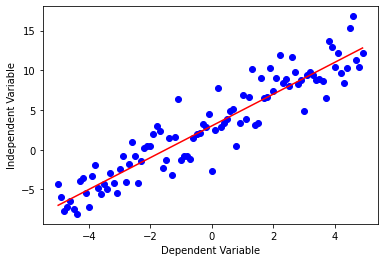

In [2]:
x = np.arange(-5.0, 5.0, 0.1)

# can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size) # 정규분포로부터 갯수가 x개인 무작위 샘플 만들기
ydata = y + y_noise

plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.xlabel('Dependent Variable')
plt.ylabel('Independent Variable')
plt.show()

Non-linear regressions are a relationship between independent variables $x$ and a dependent variable $y$ which result in a non-linear function modeled data. Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of $k$ degrees (maximum power of $x$). 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements like exponentials, logarithms, fractions, and others. For example: $$ y = \log(x)$$
    
Or even, more complicated such as :
$$ y = \log(a x^3 + b x^2 + c x + d)$$

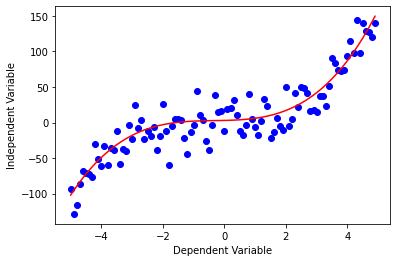

In [3]:
# cubic function's graph

x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.xlabel('Dependent Variable')
plt.ylabel('Independent Variable')
plt.show()

### Quadratic

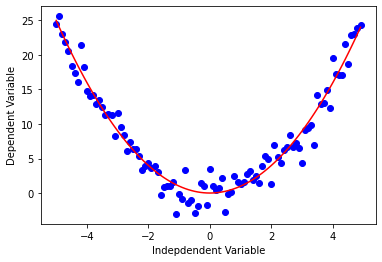

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2) # 제곱
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Exponential

An exponential function with base c is defined by $$ Y = a + b c^X$$ where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable. 

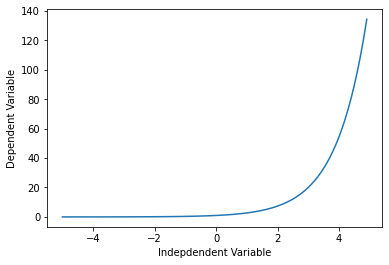

In [5]:
X = np.arange(-5.0, 5.0, 0.1)
Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Logarithmic

The response $y$ is a results of applying logarithmic map from input $x$'s to output variable $y$. It is one of the simplest form of __log()__: i.e. $$ y = \log(x)$$

Please consider that instead of $x$, we can use $X$, which can be polynomial representation of the $x$'s. In general form it would be written as  
\begin{equation}
y = \log(X)
\end{equation}

---

### Non-Linear Regression example

In [6]:
import numpy as np
import pandas as pd

#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2020-06-22 06:06:21 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year. 

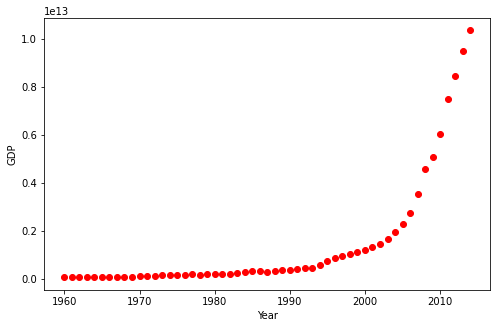

In [7]:
# plotting the dataset
plt.figure(figsize=(8, 5))
x_data, y_data = (df['Year'].values, df['Value'].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

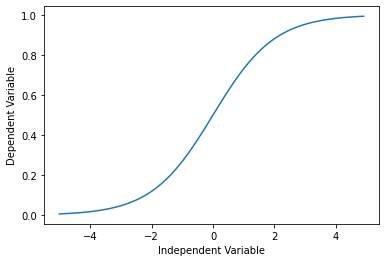

In [8]:
# Choosing model
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

In [9]:
# building the model
def sigmoid(x, Beta_1, Beta_2):
  y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
  return y

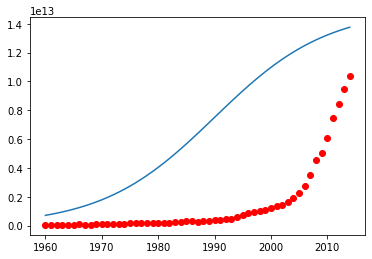

In [11]:
beta_1 = 0.10
beta_2 = 1990.0

# logistic function
Y_pred = sigmoid(x_data, beta_1, beta_2)

# plot initial prediction against datapoints
plt.plot(x_data, Y_pred * 15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [12]:
# normalize our data
xdata = x_data / max(x_data)
ydata = y_data / max(y_data)

#### How we find the best parameters for our fit line?

In [14]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(' beta_1 = %f, beta_2 = %f' % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


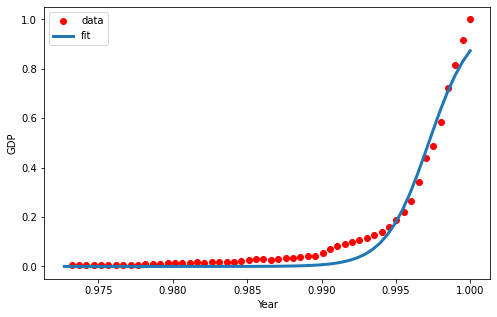

In [17]:
# ploting our resulting regression model

x = np.linspace(1960, 2015, 55)
x = x/max(x)

plt.figure(figsize=(8, 5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x, y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [19]:
# calculate what is the accuracy of our model
# split train and test set
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
train_y = ydata[msk]
test_x = xdata[~msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print('Mean absolute error: %.2f' % np.mean(np.absolute(y_hat - test_y)))
print('Residual sum of squares (MSE): %.2f' % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print('R2-score: %.2f' % r2_score(y_hat, test_y))

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.92
